## HomeWork 1 Due at Mid-night 3/10/2021

### This homework is on Exploratory Data Analysis and will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [1]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [2]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Professor Salaries dataset ##

In [3]:
salary = pd.read_csv("Salaries1.csv")
print(salary.shape)
salary.head()

(401, 6)


,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
0,Prof,B,19.0,18,Male,139750
1,Prof,B,20.0,16,Male,173200
2,AsstProf,B,4.0,3,Male,79750
3,Prof,B,45.0,39,Male,115000
4,Prof,B,40.0,41,Male,141500


In [4]:
salary.tail()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
396,Prof,A,33.0,30,Male,103106
397,Prof,A,31.0,19,Male,150564
398,Prof,A,42.0,25,Male,101738
399,Prof,A,25.0,15,Male,95329
400,AsstProf,A,8.0,4,Male,81035


In [5]:
salary.Discipline.unique()

array(['B', 'A'], dtype=object)

In [6]:
salary.Rank.unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

## Question 1. Check if there are any nulls or NA's.

In [7]:
salary.isnull().any()

Rank            False
Discipline      False
YrsSincePhd      True
YrsOfService    False
Sex              True
Salary          False
dtype: bool

## Question 2. Remove any rows that have nulls or NA's.

In [8]:
salary.dropna(inplace=True)
salary.isnull().any()

Rank            False
Discipline      False
YrsSincePhd     False
YrsOfService    False
Sex             False
Salary          False
dtype: bool

In [9]:
salary.shape

(399, 6)

## Question 3. Check if there are any outliers in all numerical fields using scatter plots and boxplots.

<AxesSubplot:xlabel='Rank', ylabel='YrsSincePhd'>

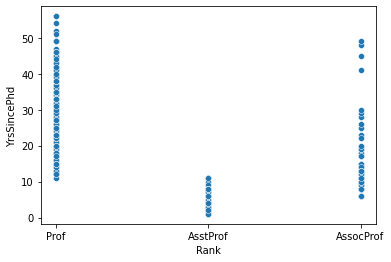

In [10]:
sns.scatterplot(x=salary['Rank'], y = salary['YrsSincePhd'])

<AxesSubplot:xlabel='YrsSincePhd'>

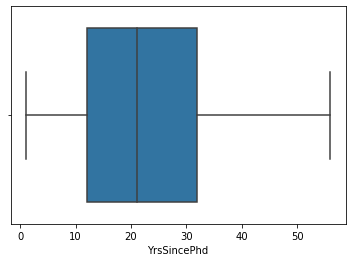

In [11]:
sns.boxplot(x=salary['YrsSincePhd'])

<AxesSubplot:xlabel='Rank', ylabel='YrsOfService'>

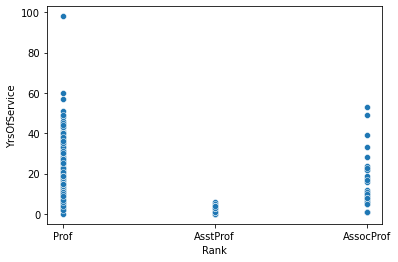

In [12]:
sns.scatterplot(x=salary['Rank'], y = salary['YrsOfService'])

<AxesSubplot:xlabel='YrsOfService'>

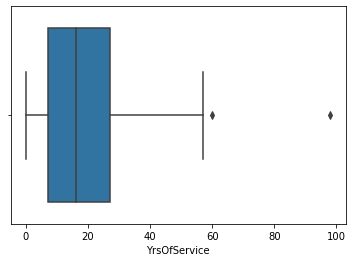

In [13]:
sns.boxplot(x=salary['YrsOfService'])

<AxesSubplot:xlabel='Rank', ylabel='Salary'>

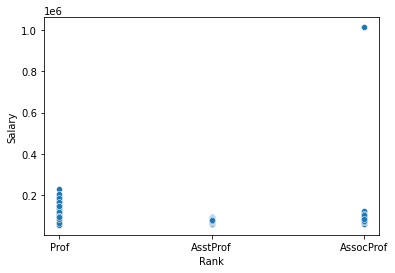

In [14]:
sns.scatterplot(x=salary['Rank'], y = salary['Salary'])

<AxesSubplot:xlabel='Salary'>

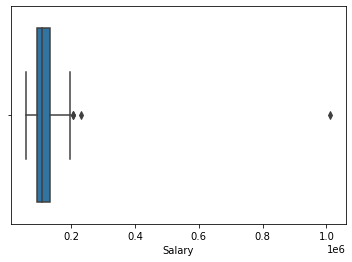

In [15]:
sns.boxplot(x=salary['Salary'])

In [16]:
print("There are outliers in Salary and YrsOfService")

There are outliers in Salary and YrsOfService


## Question 4. Display and remove the outlier rows. 

In [17]:
salary[salary.YrsOfService>80]

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
95,Prof,B,38.0,98,Male,166024


In [18]:
salary = salary[salary.YrsOfService<80]
salary.shape

(398, 6)

In [19]:
salary[salary.Salary>800000]

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
171,AssocProf,B,8.0,6,Male,1012100


In [20]:
salary = salary[salary.Salary<800000]
salary.shape

(397, 6)

## Question 5. Calculate the average years of service for each rank using SQL. Then, Calculate the average years of service for each sex using SQL.

In [21]:
sql = "select Rank, avg(YrsOfService) from salary group by Rank"
display(ps.sqldf(sql))

,Rank,avg(YrsOfService)
0,AssocProf,11.953125
1,AsstProf,2.373134
2,Prof,22.815789


In [22]:
sql = "select Sex, avg(YrsOfService) from salary group by Sex"
display(ps.sqldf(sql))

,Sex,avg(YrsOfService)
0,Female,11.564103
1,Male,18.273743


## Question 6. Calculate the average salary by discipline using SQL. Then, calculate the average salary by sex using SQL.

In [23]:
sql = "select Discipline, avg(Salary) from salary group by Discipline"
display(ps.sqldf(sql))

,Discipline,avg(Salary)
0,A,108548.430939
1,B,118028.694444


In [24]:
sql = "select Sex, avg(Salary) from salary group by Sex"
display(ps.sqldf(sql))

,Sex,avg(Salary)
0,Female,101002.410256
1,Male,115090.418994


## Question 7. For each rank, calculate the number of occurences, the mean salary, the minimum salary, and the maximum salary using one SQL statement.

In [25]:
sql = "select Rank, count(*), avg(Salary), min(Salary), max(Salary) from salary group by Rank"
display(ps.sqldf(sql))

,Rank,count(*),avg(Salary),min(Salary),max(Salary)
0,AssocProf,64,93876.437500,62884,126431
1,AsstProf,67,80775.985075,63100,97032
2,Prof,266,126772.109023,57800,231545


## Question 8. Answer Question 7 using Pandas functions

In [26]:
gpby = salary.groupby(['Rank'])['Salary']
print("Count")
print(gpby.count())
print("\n")
print("Mean Salary by Rank")
print(gpby.mean())
print("\n")
print("Min Salary by Rank")
print(gpby.min())
print("\n")
print("Max Salary by Rank")
print(gpby.max())

Count
Rank
AssocProf     64
AsstProf      67
Prof         266
Name: Salary, dtype: int64


Mean Salary by Rank
Rank
AssocProf     93876.437500
AsstProf      80775.985075
Prof         126772.109023
Name: Salary, dtype: float64


Min Salary by Rank
Rank
AssocProf    62884
AsstProf     63100
Prof         57800
Name: Salary, dtype: int64


Max Salary by Rank
Rank
AssocProf    126431
AsstProf      97032
Prof         231545
Name: Salary, dtype: int64


## Question 9. Calculate the standard deviation, skew and kurtosis for YrsSincePhd, YrsOfService and salary for each rank.

In [27]:
gpby = salary.groupby(['Rank'])['YrsSincePhd','YrsOfService','Salary']
print("STD")
display(gpby.std())

STD


<ipython-input-27-8f60e19ad632>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gpby = salary.groupby(['Rank'])['YrsSincePhd','YrsOfService','Salary']


,YrsSincePhd,YrsOfService,Salary
Rank,,,
AssocProf,9.652584,10.100180,13831.699844
AsstProf,2.541381,1.495811,8174.112637
Prof,10.108830,11.590493,27718.674999


In [28]:
print("Skew")
display(gpby.skew())

Skew


,YrsSincePhd,YrsOfService,Salary
Rank,,,
AssocProf,2.139123,2.420949,-0.085893
AsstProf,0.524578,-0.026995,0.082975
Prof,0.358756,0.448171,0.590007


In [29]:
print("AssocProf Kurtosis")
print(salary[salary.Rank == 'AssocProf'][['YrsSincePhd','YrsOfService','Salary']].kurtosis())
print("\nAsstProf Kurtosis")
print(salary[salary.Rank == 'AsstProf'][['YrsSincePhd','YrsOfService','Salary']].kurtosis())
print("\nProf Kurtosis")
print(salary[salary.Rank == 'Prof'][['YrsSincePhd','YrsOfService','Salary']].kurtosis())

AssocProf Kurtosis
YrsSincePhd     4.414356
YrsOfService    6.350832
Salary         -0.586327
dtype: float64

AsstProf Kurtosis
YrsSincePhd    -0.358052
YrsOfService   -0.658746
Salary         -0.920936
dtype: float64

Prof Kurtosis
YrsSincePhd    -0.619154
YrsOfService   -0.225623
Salary          0.376064
dtype: float64


## Question 10. Plot the histogram of YrsOfService and Salary for different Ranks using 5 bins

array([[<AxesSubplot:title={'center':'AssocProf'}>,
        <AxesSubplot:title={'center':'AsstProf'}>],
       [<AxesSubplot:title={'center':'Prof'}>, <AxesSubplot:>]],
      dtype=object)

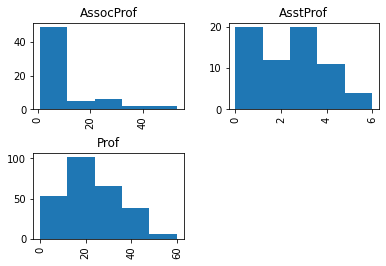

In [30]:
salary['YrsOfService'].hist(by=salary['Rank'], bins=5)

array([[<AxesSubplot:title={'center':'AssocProf'}>,
        <AxesSubplot:title={'center':'AsstProf'}>],
       [<AxesSubplot:title={'center':'Prof'}>, <AxesSubplot:>]],
      dtype=object)

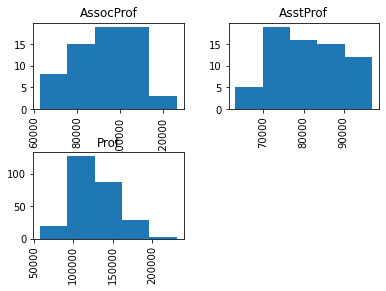

In [31]:
salary['Salary'].hist(by=salary['Rank'], bins=5)

## Question 11. Describe the YrsOfService and Salary distributions for each rank. Use the skew and kurotsis in your descriptions.
(i.e. who has positive and negative skew and who has positive and negative Kurotsis)

##### For Associate Professors:
- YrsOfService distribution has both postive skew and postive kurtosis
- Salary distribution has both negative skew and negative kurtosis
- This shows that Associate Professor spend more than average years on service but make less money.

##### For Assistant Professors:
- YrsOfService distribution has both negative skew and negative kurtosis
- Salary distribution has postive skew and negative kurtosis
- This shows that Assistant Professors spend less years than average years on service but make more money.

##### For Professors:
- YrsOfService distribution has postive skew and negative kurtosis
- Salary distribution has both postive skew and postive kurtosis
- This shows that Professors spend more years than average years on service and make more money.

## Question 12. Calculate correlations of all the factors among themselves and determine which factors among YrsSincePhd or YrsOfService will affect Salary the most. Will your answers change if you break it down by Sex and by Discipline?

In [32]:
salary.corr()

,YrsSincePhd,YrsOfService,Salary
YrsSincePhd,1.000000,0.909649,0.419231
YrsOfService,0.909649,1.000000,0.334745
Salary,0.419231,0.334745,1.000000


YrsSincePhd affect Salary the most.

In [33]:
display(salary.groupby('Sex').corr())

YrsSincePhd  YrsOfService    Salary
Sex                                                     
Female YrsSincePhd      1.000000      0.857775  0.620135
       YrsOfService     0.857775      1.000000  0.556021
       Salary           0.620135      0.556021  1.000000
Male   YrsSincePhd      1.000000      0.910520  0.392718
       YrsOfService     0.910520      1.000000  0.306599
       Salary           0.392718      0.306599  1.000000

The answer will not change. YrsSincePhd still affect Salary the most.

In [34]:
display(salary.groupby('Discipline').corr())

YrsSincePhd  YrsOfService    Salary
Discipline                                                  
A          YrsSincePhd      1.000000      0.916403  0.401158
           YrsOfService     0.916403      1.000000  0.235969
           Salary           0.401158      0.235969  1.000000
B          YrsSincePhd      1.000000      0.899218  0.535197
           YrsOfService     0.899218      1.000000  0.502052
           Salary           0.535197      0.502052  1.000000

The answer will not change. YrsSincePhd still affect Salary the most.

### Now Load a different dataset (MPG dataset number 3)

In [35]:
mpg = pd.read_csv("mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


## Question 13: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

In [36]:
print(mpg.isnull().any())
print("\n")
print("Yes, there are missing values in mpg, horsepower and weight")

mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool


Yes, there are missing values in mpg, horsepower and weight


In [37]:
mpg['mpg'] = mpg['mpg'].fillna(mpg['mpg'].mean())
mpg['horsepower'] = mpg['horsepower'].fillna(mpg['horsepower'].mean())
mpg['weight'] = mpg['weight'].fillna(mpg['weight'].mean())
print(mpg.isnull().any())
print(mpg.shape)

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool
(405, 9)
